### User information.

>- msno : user id 
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

### songs 

The songs. Note that data is in unicode.

>- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language


### song_extra_info

>- song_id
- song name - the name of the song.
- isrc - International Standard Recording Code, theoretically can be used as an identity of a song. *** However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.***


### train

>- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are `recurring` listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### test

>- id: row id (will be used for submission)
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.


In [3]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## 0) Load Data 

In [4]:
# load data 
members = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/members.csv')



### 0-1) members 

In [5]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [6]:
# city 

#.plot(kind='barh')
#plt.xlabel('members count')
#plt.ylabel('city code')
#plt.title('Members City')

pd.DataFrame(members.city.value_counts()).T

,1,13,5,4,15,22,6,14,12,9,...,11,18,10,21,3,17,7,16,20,19
city,19445,3395,2634,1732,1525,1467,913,708,491,309,...,285,259,216,213,204,152,93,35,27,11


In [7]:
# gender 

print ('Total members count : ' , len(members))
print ('Members with gender data count : ' ,len(members[pd.notnull(members['gender'])]))

print ('')
print ('member gender (not-null) : ')
members.gender.value_counts()

Total members count :  34403
Members with gender data count :  14501

member gender (not-null) : 


male      7405
female    7096
Name: gender, dtype: int64

In [8]:
# member register way 

members.registered_via.value_counts()

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

In [9]:
def get_timestamp_date(x):
    #year = int(str(x[0:4]))
    #month = int(str(x[4:6]))
    #year = int(str(x[6:8]))
    #date = year + '-' + month + '-' + year
    #return year
    pass
    

In [10]:
# extract time feature 

members['expiration_year'] = members['expiration_date'].apply(lambda x : int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x : int(str(x)[4:6]))
members['expiration_day'] = members['expiration_date'].apply(lambda x : int(str(x)[6:8]))

members['registration_init_year'] = members['registration_init_time'].apply(lambda x : int(str(x)[0:4]))
members['registration_initn_month'] = members['registration_init_time'].apply(lambda x : int(str(x)[4:6]))
members['registration_initn_day'] = members['registration_init_time'].apply(lambda x : int(str(x)[6:8]))



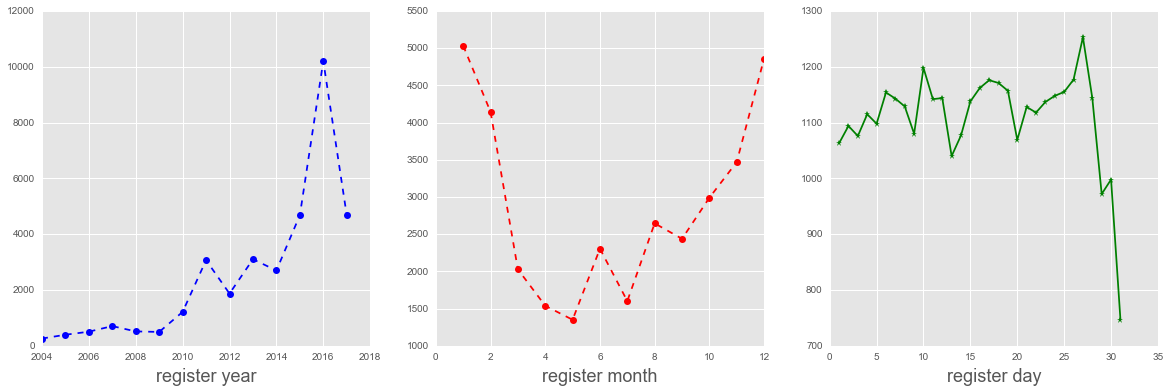

In [11]:
# register time 

fig, ax = plt.subplots(ncols=3, sharey=False)
fig.set_size_inches(20,6)

ax[0].plot(members.groupby('registration_init_year').count()['msno'],'b--o')
ax[1].plot(members.groupby('registration_initn_month').count()['msno'],'r--o')
ax[2].plot(members.groupby('registration_initn_day').count()['msno'],'g-*')


ax[0].set_xlabel( 'register year', fontsize=18)
ax[1].set_xlabel( 'register month', fontsize=18)
ax[2].set_xlabel( 'register day', fontsize=18)

plt.show()


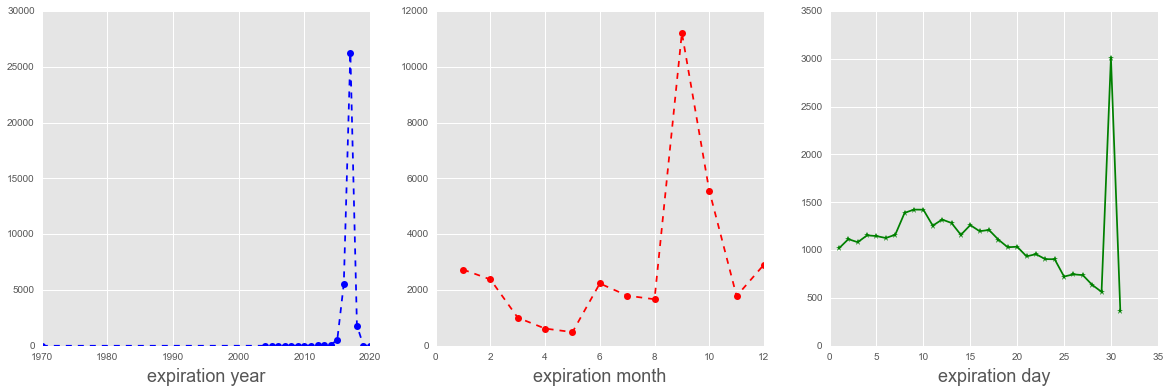

In [12]:
# expire time 

fig, ax = plt.subplots(ncols=3, sharey=False)
fig.set_size_inches(20,6)

ax[0].plot(members.groupby('expiration_year').count()['msno'],'b--o')
ax[1].plot(members.groupby('expiration_month').count()['msno'],'r--o')
ax[2].plot(members.groupby('expiration_day').count()['msno'],'g-*')


ax[0].set_xlabel( 'expiration year', fontsize=18)
ax[1].set_xlabel( 'expiration month', fontsize=18)
ax[2].set_xlabel( 'expiration day', fontsize=18)

plt.show()


In [13]:
#age_.groupby('bd').count()['msno'].reset_index().head(3)
#pd.DataFrame(age_.bd.value_counts())

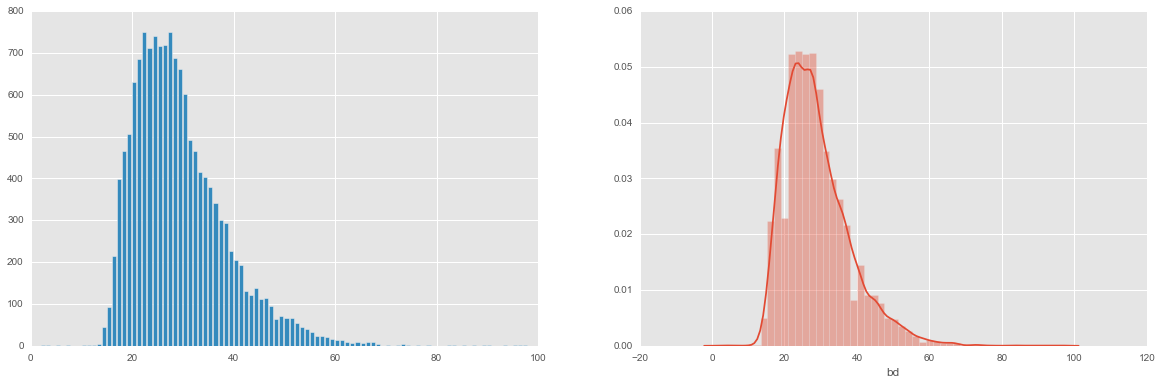

In [14]:
# bd (birthday AKA age)


# many outliers in this column ( NaN, age < 0 or age > 150...)
# filter all them out, and make a distribution plot first
# but how to dealing with them in further modeling still need to be discussed 

age_ = members[(members.bd > 0 ) & (members.bd < 100)]

fig, ax = plt.subplots(ncols=2, sharey=False)
fig.set_size_inches(20,6)

x = age_.groupby('bd').count()['msno'].reset_index().bd
y = age_.groupby('bd').count()['msno'].reset_index().msno

ax[0].bar(x,y)
# hack the plot 
sns.distplot(age_.bd)



In [15]:
print ('Members with "OK" age data  : ', len(age_)) 
print ('Whole member count :  ', len(members)) 

Members with "OK" age data  :  14447
Whole member count :   34403


In [16]:
members.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,expiration_year,expiration_month,expiration_day,registration_init_year,registration_initn_month,registration_initn_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2017,9,20,2011,8,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2017,6,22,2015,6,28
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2017,7,12,2016,4,11


### 0-2 ) Songs

In [17]:
# load data 
songs = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/songs.csv')


In [18]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [19]:
#songs.song_id.drop_duplicates
print ('Total Songs count : ', len(songs))

Total Songs count :  2296320


In [20]:
# song lenth

songs['song_length_sec'] = songs.song_length.map(lambda x : x*(0.001))


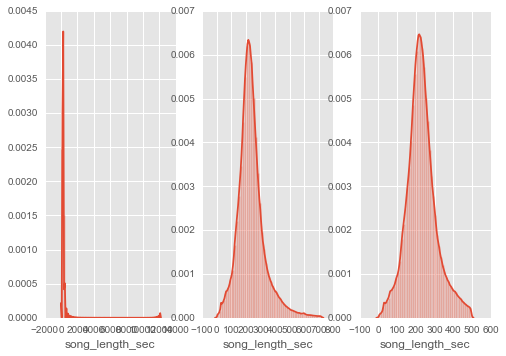

In [21]:
# Plotting multiple different plots in one figure using Seaborn
# https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn

fig, axs = plt.subplots(ncols=3)

sns.distplot(songs.song_length_sec, ax=axs[0])
sns.distplot(songs[songs.song_length_sec < songs.song_length_sec.quantile(.99)].song_length_sec, ax=axs[1])
sns.distplot(songs[songs.song_length_sec < songs.song_length_sec.quantile(.97)].song_length_sec, ax=axs[2])

#ax[0].set_xlabel( 'song length (all data)', fontsize=18)
#ax[1].set_xlabel( 'song length (data song length  < top 99%)', fontsize=18)
#ax[2].set_xlabel( 'song length (data song length  < top 97%)', fontsize=18)



In [22]:
# language 

songs.language.value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

In [23]:
print ('Total songs count : ' , len(songs))
print ('songs with language data count : ' ,len(songs[pd.notnull(songs['language'])]))


Total songs count :  2296320
songs with language data count :  2296319


In [24]:
# artist_name
songs.artist_name.value_counts().head(10)
#songs.artist_name.value_counts().tail(10)

Various Artists       145916
証聲音樂圖書館 ECHO MUSIC     11276
Billy Vaughn            4828
รวมศิลปิน               4432
Richard Clayderman      4180
Elvis Presley           4038
Nat King Cole           3806
Billie Holiday          3674
Frank Sinatra           3594
Armin van Buuren        2818
Name: artist_name, dtype: int64

In [25]:
# composer
songs.composer.value_counts().head(10)

Neuromancer                17888
Johann Sebastian Bach      12105
Wolfgang Amadeus Mozart    10839
Marco Rinaldo              10803
Traditional                10105
Ludwig van Beethoven        7290
佚名                          6259
Sacchetto G.                5479
Frédéric Chopin             5468
Antonio Vivaldi             3376
Name: composer, dtype: int64

In [26]:
# lyricist
# A lyricist or lyrist is a person who writes lyrics—words for songs—
# as opposed to a composer, who writes the song's melody. 
#songs.lyricist.value_counts()

In [27]:
# genre_ids : genre category 
# Some songs have multiple genres and they are separated by |
# this may be a good label made by various ways, can be good to classification
# but maybe some genres are not make sense in cases 
# need to check later 

songs.genre_ids.value_counts().head(3)


465     567911
958     176349
2022    168870
Name: genre_ids, dtype: int64

In [28]:
#songs.genre_ids.value_counts().plot()
#plt.xlim(0,30)

In [29]:
#songs.head(10) #.sort_values('language')

In [30]:
songs.head(5)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_sec
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,247.640
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,197.328
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,231.781
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,273.554
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,140.329


### 0-3) song_extra_info

In [31]:
# load data 
song_extra_info = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/song_extra_info.csv')


In [32]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    object
name       object
isrc       object
dtypes: object(3)
memory usage: 52.6+ MB


In [33]:
song_extra_info.head(3)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303


In [34]:
print ('counts of song_extra_info data : ' , len(song_extra_info))
print ('counts different songs of song_extra_info data : ' ,  len(set(song_extra_info.song_id)))
print ('counts different isrc of song_extra_info data : ' ,  len(set(song_extra_info.isrc)))
print ('counts different songs name of song_extra_info data : ' , len(set(song_extra_info.name)))

counts of song_extra_info data :  2295971
counts different songs of song_extra_info data :  2295971
counts different isrc of song_extra_info data :  1806826
counts different songs name of song_extra_info data :  1168980


In [35]:
song_extra_info.groupby('isrc')\
               .count()\
               .sort_values('name',ascending=False)['song_id']\
               .head(5)

isrc
GBPS81518952    207
GBPS81527416    205
GBPS81518950    195
GBPS81518680    195
GBPS81518682    194
Name: song_id, dtype: int64

#### Many songs share one SAME isrc
since maybe the same songs be re-published in different countries / isrc in fact is an "un-official" song ID, as data guide line said 

### 0-4) train data

In [36]:
# load data 
df_train = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/train.csv')


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [38]:
print ('counts of train data : ' , len(df_train))
print ('counts different users of train data : ' ,  len(set(df_train.msno)))
print ('counts different songs of train data : ' ,  len(set(df_train.song_id)))


counts of train data :  7377418
counts different users of train data :  30755
counts different songs of train data :  359966


In [39]:
df_train.target.value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

In [40]:
df_train.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
null               6478
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [41]:
df_train.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [42]:
df_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1


In [43]:
# how many songs users listen ? 
listen_count = df_train.groupby('msno').count()['song_id'].reset_index()

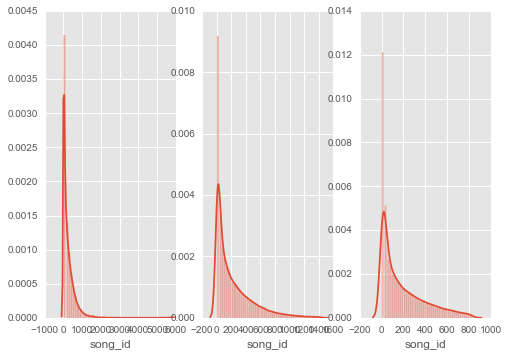

In [44]:
fig, axs = plt.subplots(ncols=3)

sns.distplot(listen_count.song_id, ax=axs[0])
sns.distplot(listen_count[listen_count.song_id < listen_count.song_id.quantile(.99)].song_id, ax=axs[1])
sns.distplot(listen_count[listen_count.song_id < listen_count.song_id.quantile(.95)].song_id, ax=axs[2])

#plt.xlabel('songs users listened')

In [45]:
# source system tab 

df_train.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
null               6478
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [106]:
system_tab_target=df_train.groupby(['source_system_tab','target'])\
                          .count()\
                          .reset_index()[['source_system_tab','target','msno']]
                          
system_tab_target.columns = ['source_system_tab','target','count']

  source_system_tab  target    count
0          discover       0  1273185
1          discover       1   906067
2           explore       0    97050


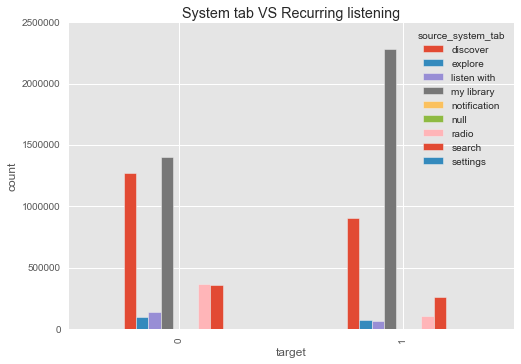

In [107]:
pd.pivot_table(system_tab_target,
               index='target',
               columns='source_system_tab',
               values='count').plot(kind='bar')

print (system_tab_target.head(3))
plt.ylabel('count')
plt.title('System tab VS Recurring listening')

In [104]:
# source screen name 

df_train.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [105]:
system_screen_target=df_train.groupby(['source_screen_name','target'])\
                          .count()\
                          .reset_index()[['source_screen_name','target','msno']]
                          
system_screen_target.columns = ['source_screen_name','target','count']

  source_screen_name  target   count
0         Album more       0  256063
1         Album more       1  164093
2        Artist more       0  147202


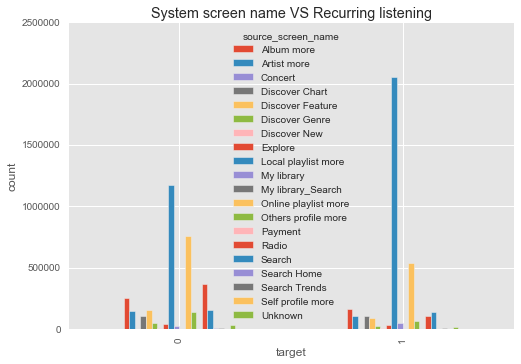

In [110]:
pd.pivot_table(system_screen_target,
               index='target',
               columns='source_screen_name',
               values='count').plot(kind='bar')

print (system_screen_target.head(3))
plt.ylabel('count')
plt.title('System screen name VS Recurring listening')

In [111]:
# source type  

df_train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [112]:
source_type_target=df_train.groupby(['source_type','target'])\
                          .count()\
                          .reset_index()[['source_type','target','msno']]
                          
source_type_target.columns = ['source_type','target','count']

  source_type  target   count
0       album       0  289547
1       album       1  187797
2      artist       0    1298


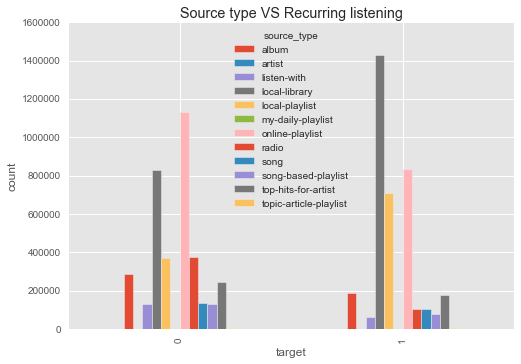

In [113]:
pd.pivot_table(source_type_target,
               index='target',
               columns='source_type',
               values='count').plot(kind='bar')

print (source_type_target.head(3))
plt.ylabel('count')
plt.title('Source type VS Recurring listening')

In [48]:
df_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1


In [49]:
print ('counts of train data : ' , len(df_train))
print ('counts different users of train data : ' ,  len(set(df_train.msno)))
print ('counts different songs of train data : ' ,  len(set(df_train.song_id)))


counts of train data :  7377418
counts different users of train data :  30755
counts different songs of train data :  359966


### 0-5) test data 

In [50]:
# load data 
df_test = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/test.csv')


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [52]:
df_test.head(3)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist


In [53]:
print ('counts of test data : ' , len(df_test))
print ('counts different users of test data : ' ,  len(set(df_test.msno)))
print ('counts different songs of test data : ' ,  len(set(df_test.song_id)))


counts of test data :  2556790
counts different users of test data :  25131
counts different songs of test data :  224753


In [54]:
#df_train.source_system_tab.value_counts()